In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(x, std, mean):
    const = 1.0 / np.sqrt(2*np.pi*(std**2))
    pdf_normal_dist = const*np.exp(-((x-mean)**2)/(2.0*(std**2)))
    return pdf_normal_dist

x = np.linspace(0, 1, num=100)

good_pdf = pdf(x,0.1,0.4)
bad_pdf = pdf(x,0.1,0.6)
bad_pdf


array([6.07588285e-08, 1.10816035e-07, 2.00062042e-07, 3.57516149e-07,
       6.32405307e-07, 1.10729726e-06, 1.91911861e-06, 3.29236736e-06,
       5.59092457e-06, 9.39783583e-06, 1.56365505e-05, 2.57527092e-05,
       4.19830294e-05, 6.77475349e-05, 1.08213663e-04, 1.71095889e-04,
       2.67772471e-04, 4.14821401e-04, 6.36099797e-04, 9.65513246e-04,
       1.45064148e-03, 2.15740074e-03, 3.17592640e-03, 4.62784614e-03,
       6.67507686e-03, 9.53021075e-03, 1.34684499e-02, 1.88408981e-02,
       2.60888216e-02, 3.57582454e-02, 4.85139698e-02, 6.51517825e-02,
       8.66073334e-02, 1.13959860e-01, 1.48428748e-01, 1.91360817e-01,
       2.44206312e-01, 3.08481859e-01, 3.85719192e-01, 4.77399263e-01,
       5.84872384e-01, 7.09266361e-01, 8.51385964e-01, 1.01160853e+00,
       1.18978190e+00, 1.38513183e+00, 1.59618688e+00, 1.82072870e+00,
       2.05577517e+00, 2.29760237e+00, 2.54180950e+00, 2.78342808e+00,
       3.01707347e+00, 3.23713374e+00, 3.43798736e+00, 3.61423830e+00,
      

In [2]:
def plot_pdf(good_pdf, bad_pdf, ax):
    ax.fill(x, good_pdf, "g", alpha=0.5)
    ax.fill(x, bad_pdf,"r", alpha=0.5)
    ax.set_xlim([0,1])
    ax.set_ylim([0,5])
    ax.set_title("Probability Distribution", fontsize=14)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_xlabel('P(X="bad")', fontsize=12)
    ax.legend(["good","bad"])

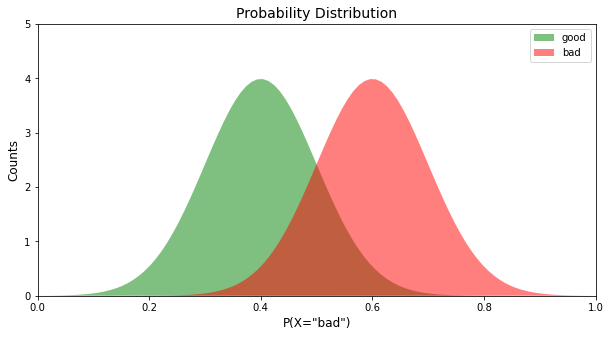

In [3]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_pdf(good_pdf, bad_pdf, ax)

In [4]:
def plot_roc(good_pdf, bad_pdf, ax):
    #Total
    total_bad = np.sum(bad_pdf)
    total_good = np.sum(good_pdf)
    #Cumulative sum
    cum_TP = 0
    cum_FP = 0
    #TPR and FPR list initialization
    TPR_list=[]
    FPR_list=[]
    #Iteratre through all values of x
    for i in range(len(x)):
        #We are only interested in non-zero values of bad
        if bad_pdf[i]>0:
            cum_TP+=bad_pdf[len(x)-1-i]
            cum_FP+=good_pdf[len(x)-1-i]
        FPR=cum_FP/total_good
        TPR=cum_TP/total_bad
        TPR_list.append(TPR)
        FPR_list.append(FPR)
    #Calculating AUC, taking the 100 timesteps into account
    auc=np.sum(TPR_list)/100
    #Plotting final ROC curve
    ax.plot(FPR_list, TPR_list)
    ax.plot(x,x, "--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title("ROC Curve", fontsize=14)
    ax.set_ylabel('TPR', fontsize=12)
    ax.set_xlabel('FPR', fontsize=12)
    ax.grid()
    ax.legend(["AUC=%.3f"%auc])

In [5]:
bad_pdf

array([6.07588285e-08, 1.10816035e-07, 2.00062042e-07, 3.57516149e-07,
       6.32405307e-07, 1.10729726e-06, 1.91911861e-06, 3.29236736e-06,
       5.59092457e-06, 9.39783583e-06, 1.56365505e-05, 2.57527092e-05,
       4.19830294e-05, 6.77475349e-05, 1.08213663e-04, 1.71095889e-04,
       2.67772471e-04, 4.14821401e-04, 6.36099797e-04, 9.65513246e-04,
       1.45064148e-03, 2.15740074e-03, 3.17592640e-03, 4.62784614e-03,
       6.67507686e-03, 9.53021075e-03, 1.34684499e-02, 1.88408981e-02,
       2.60888216e-02, 3.57582454e-02, 4.85139698e-02, 6.51517825e-02,
       8.66073334e-02, 1.13959860e-01, 1.48428748e-01, 1.91360817e-01,
       2.44206312e-01, 3.08481859e-01, 3.85719192e-01, 4.77399263e-01,
       5.84872384e-01, 7.09266361e-01, 8.51385964e-01, 1.01160853e+00,
       1.18978190e+00, 1.38513183e+00, 1.59618688e+00, 1.82072870e+00,
       2.05577517e+00, 2.29760237e+00, 2.54180950e+00, 2.78342808e+00,
       3.01707347e+00, 3.23713374e+00, 3.43798736e+00, 3.61423830e+00,
      

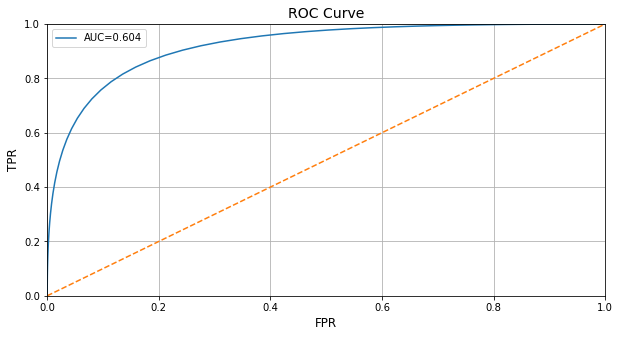

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_roc(good_pdf, bad_pdf, ax)

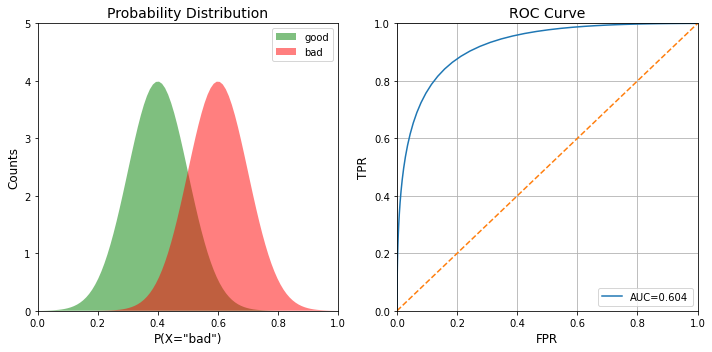

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_pdf(good_pdf, bad_pdf, ax[0])
plot_roc(good_pdf, bad_pdf, ax[1])
plt.tight_layout()

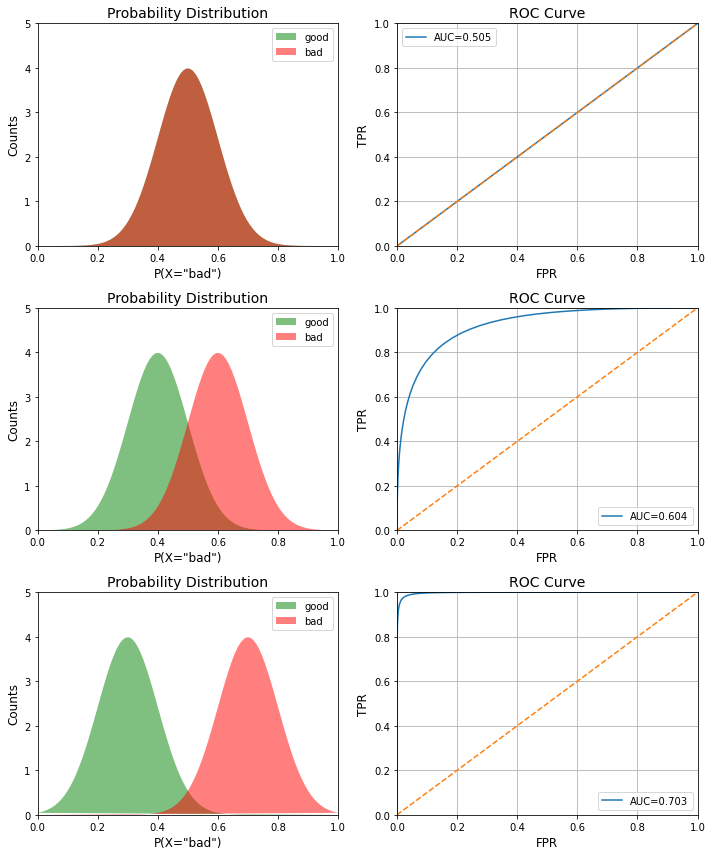

In [8]:
x = np.linspace(0, 1, num=100)
fig, ax = plt.subplots(3,2, figsize=(10,12))
means_tuples = [(0.5,0.5),(0.4,0.6),(0.3,0.7)]
i=0
for good_mean, bad_mean in means_tuples:
    good_pdf = pdf(x, 0.1, good_mean)
    bad_pdf  = pdf(x, 0.1, bad_mean)
    plot_pdf(good_pdf, bad_pdf, ax[i,0])
    plot_roc(good_pdf, bad_pdf, ax[i,1])
    i+=1
plt.tight_layout()